In [1]:
import pandas as pd
import geopandas as gpd
import numpy as np
import os
import matplotlib.pyplot as plt
import contextily as ctx
%matplotlib inline

In [2]:
raw = "https://raw.githubusercontent.com/wmgeolab/geoBoundaries/"
fold = "/releaseData/gbOpen/"

In [3]:
columns_keep = [
        'adm0',
        'adm1',
        'adm2',
        'year',
        'crop',
        'area_plant',
        'production',
        'cropped_ha',
        'irrigated_ha',
        'irrigated_share',
        'median_harvest_date',
        'median_plant_date',
        'median_plant_month',
        'median_harvest_month',
        'season_length',
        'gdppc_adm0_PWT',
        'loggdppc_adm0_PWT'
    ]
nga_columns_keep = columns_keep.copy()
nga_columns_keep.remove('adm2')

## Nigeria

In [4]:
nga_commit_adm1 = "463669d0dcbd02b92fa98d0c59aff622f826152c"
nga_geo_adm1 = "NGA/ADM1/geoBoundaries-NGA-ADM1_simplified.geojson"
nga_url_adm1 = raw + nga_commit_adm1 + fold + nga_geo_adm1

In [5]:
nga_shp = gpd.read_file(nga_url_adm1)[
    ['shapeName', 'geometry']
].rename(
    columns = {'shapeName': 'adm1'}
    ).set_index(keys = 'adm1')

In [6]:
nga_crop = pd.read_stata('data/NGA_corn_adm1_gmfd_v3.dta')
keys = nga_crop.adm1.sort_values().unique()
values = nga_shp.index.sort_values().unique()
match_dictionary = dict(zip(keys, values))
nga_crop = nga_crop.replace({"adm1": match_dictionary})
nga_crop.to_csv('data/NGA_corn_adm1_gmfd_v3.csv')
nga_crop = nga_crop[nga_columns_keep].set_index(keys = 'adm1') 

In [7]:
nga_joined = nga_shp.join(other = nga_crop, how = 'left').reset_index()

<AxesSubplot:>

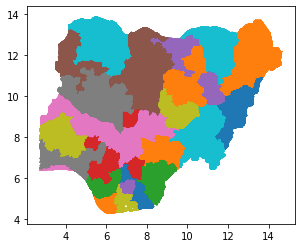

In [8]:
nga_joined.plot(column = 'adm1')

## Tanzania

In [9]:
tza_commit_adm1 = "566c53d780362c9831daee4e166d8dcb85903773"
tza_commit_adm2 = "77402fbfa563a6808db3f009283bfa11c75eb836"
tza_geo_adm1 = "TZA/ADM1/geoBoundaries-TZA-ADM1_simplified.geojson"
tza_geo_adm2 = "TZA/ADM2/geoBoundaries-TZA-ADM2_simplified.geojson"
tza_url_adm1 = raw + tza_commit_adm1 + fold + tza_geo_adm1
tza_url_adm2 = raw + tza_commit_adm2 + fold + tza_geo_adm2

In [10]:
tza_crop = pd.read_stata('data/TZA_corn_adm2_gmfd_v3.dta')
tza_crop.adm1 = tza_crop.adm1.replace('_', ' ', regex=True).str.title()
tza_crop.adm2 = tza_crop.adm2.replace('_', ' ', regex=True).str.title()
tza_crop.to_csv('data/TZA_corn_adm2_gmfd_v3.csv')
tza_crop = tza_crop[columns_keep].set_index(keys = ['adm1', 'adm2'])

In [11]:
tza_shp_adm1 = gpd.read_file(tza_url_adm1)[
    ['shapeName', 'geometry']
].rename(columns = {'shapeName': 'adm1'})

tza_shp_adm2 = gpd.read_file(tza_url_adm2)[
    ['shapeName', 'geometry']
].rename(columns = {'shapeName': 'adm2'})

tza_shp = tza_shp_adm2.sjoin(
    tza_shp_adm1, 
    how = 'left', 
    predicate = "intersects")[
    ['adm1', 'adm2', 'geometry']
].set_index(keys = ['adm1', 'adm2'])

In [12]:
tza_joined = tza_shp.join(other = tza_crop, how = 'left').reset_index()

<AxesSubplot:>

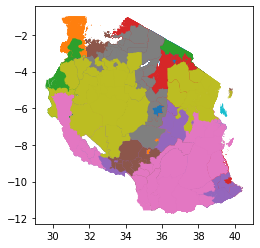

In [13]:
tza_joined.plot(column = 'adm1')

<AxesSubplot:>

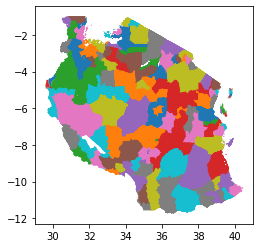

In [14]:
tza_joined.plot(column = 'adm2')

## Zambia

In [15]:
zmb_commit_adm1 = "0db20f9fcdd476c93531b80f04bbe90103aef72f"
zmb_commit_adm2 = "ba7b3ab481359205226ac8712f07326d6a7edb3d"
zmb_geo_adm1 = "ZMB/ADM1/geoBoundaries-ZMB-ADM1_simplified.geojson"
zmb_geo_adm2 = "ZMB/ADM2/geoBoundaries-ZMB-ADM2_simplified.geojson"
zmb_url_adm1 = raw + zmb_commit_adm1 + fold + zmb_geo_adm1
zmb_url_adm2 = raw + zmb_commit_adm2 + fold + zmb_geo_adm2

In [16]:
zmb_crop = pd.read_stata('data/ZMB_corn_adm2_gmfd_v1.dta')
# zmb_crop.adm0 = "Zambia"
zmb_crop.adm1 = zmb_crop.adm1.replace('_', ' ', regex=True).str.title()
zmb_crop.adm2 = zmb_crop.adm2.replace('_', ' ', regex=True).str.title()
zmb_crop.to_csv('data/ZMB_corn_adm2_gmfd_v1.csv')
zmb_crop = zmb_crop[columns_keep].set_index(keys = ['adm1', 'adm2'])

In [17]:
zmb_shp_adm1 = gpd.read_file(zmb_url_adm1)[
    ['shapeName', 'geometry']
].rename(columns = {'shapeName': 'adm1'})

zmb_shp_adm2 = gpd.read_file(zmb_url_adm2)[
    ['shapeName', 'geometry']
].rename(columns = {'shapeName': 'adm2'})

zmb_shp = zmb_shp_adm2.sjoin(
    zmb_shp_adm1, 
    how = 'left', 
    predicate = "intersects")[
    ['adm1', 'adm2', 'geometry']
].set_index(keys = ['adm1', 'adm2'])

In [18]:
zmb_joined = zmb_shp.join(other = zmb_crop, how = 'left').reset_index()
zmb_joined.adm0 = "zambia"

<AxesSubplot:>

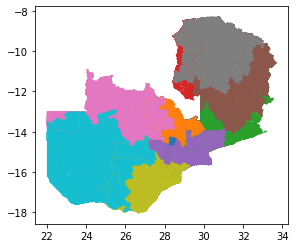

In [19]:
zmb_joined.plot(column = 'adm1')

<AxesSubplot:>

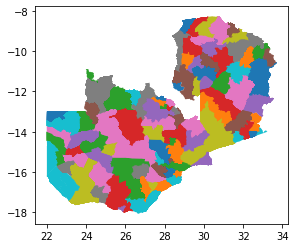

In [20]:
zmb_joined.plot(column = 'adm2')

## Unified

In [21]:
nga_joined.shape

(444, 17)

In [22]:
tza_joined.shape

(1080, 18)

In [23]:
zmb_joined.shape

(1054, 18)

In [24]:
gdf = nga_joined.append(tza_joined).append(zmb_joined)

In [25]:
gdf = gdf[columns_keep + ['geometry']]

In [26]:
gdf.to_file("data/unified_crop_data.gpkg")

### Unified Plot

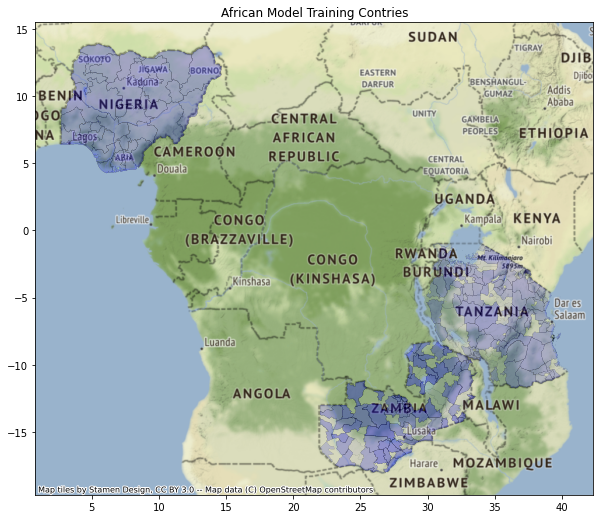

In [27]:
fig, ax = plt.subplots(figsize=(10, 10))

gdf.plot(
    ax = ax
    , color = "blue"
    , edgecolor = 'black'
    , linewidth = .25
    # , cmap = "viridis"
    # , column = 'production'
    # , legend  = True
    # , legend_kwds = {"shrink": .5}
    , alpha = .025
)

ax.grid(False)
ax.set_title('African Model Training Contries', fontsize=12)

ctx.add_basemap(ax, crs="EPSG:4326")

In [28]:
# gdf.plot?